In [49]:
import os
import time
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

# debugging variable testing - set true to check run time's and debug statements
debug = True

# format print output 
pa.set_option('display.width', 1000)
pa.set_option('max_rows', 250)

# Create Training and Test Sets

36 patients with 8 sensors, each performs 2 trials - we use 1 for training & 1 for testing 

The dataset is open-sourced from UCI and can be found here,
https://archive.ics.uci.edu/ml/machine-learning-databases/00481/

In [72]:

# here is the path to the dataset - note, you'll need to change this path if running the notebook locally
emg_path = "/Users/andrewmuzik/Desktop/EECS_298/EMG_data_for_gestures-master/"

# get time to read in dataset
if debug:
    start_time = time.time()
    
# ignore the last folder in EMG - Readme
first_trials = os.listdir(emg_path + "01/")
train_df = pa.read_csv(emg_path + "01/" + first_trials[0], delimiter=r"\s+")

# read in rest of patients
for patient in range(2, 10):
    
    # determine the patient number
    if patient < 10:
        patient = "0" + str(patient) + "/"
    else:
        patient = str(patient) + "/"
        
    # get dir's for each trial (train / test)
    trials = os.listdir(emg_path + patient)
    
    # get patient trials
    train_slice = pa.read_csv(emg_path + patient + trials[0], delimiter=r"\s+")
    
    # join patient into dataset
    train_df = pa.concat([train_df, train_slice], axis=0, join='inner', ignore_index=True)

# drop last rows of training / test sets - grabage, NaN
train_df = train_df.head(-1)    

if debug:
    end_time = time.time()
    
# get time and show examples
if debug:
    print("\nTime to read data..." + str(end_time - start_time))
    print("Training samples... \n" + str(len(train_df)) + " total")
    print(train_df[:20])


Time to read data...2.06168794632
Training samples... 
551135 total
    time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  channel8  class
0      1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  -0.00001      0
1      5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  -0.00001      0
2      6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
3      7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
4      8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
5      9  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
6     10  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
7     11  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001      0
8     12  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.0000

# Clean Up DataSets 

    Standardize using Min Max
    Trim all unmarked instances (patients could be moving, stretching, etc)


In [73]:
# normalize the data

# must create scaler instance before using
scaler = preprocessing.MinMaxScaler()

train_df_norm = scaler.fit_transform(train_df)

# cast back to dataframe
train_df_norm = pa.DataFrame(train_df_norm, columns=train_df.columns)

# replace normalized outputs with correct ones
train_df_norm.iloc[:,9] = train_df.iloc[:,9]

print(train_df_norm[:20])

        time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  channel8  class
0   0.000000  0.505882  0.494118  0.498039  0.490196  0.501961  0.498039  0.501961  0.498039      0
1   0.000054  0.505882  0.494118  0.498039  0.490196  0.501961  0.498039  0.501961  0.498039      0
2   0.000067  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
3   0.000081  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
4   0.000094  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
5   0.000107  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
6   0.000121  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
7   0.000134  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0
8   0.000148  0.498039  0.505882  0.509804  0.501961  0.505882  0.494118  0.498039  0.505882      0


In [74]:
# Cut the noise - (unmarked data)
train_df_norm.drop(train_df_norm.loc[train_df_norm['class']==0].index, inplace=True)

if debug:
    print("Cleaned Training samples... \n" + str(len(train_df_norm)) + " total")
    print(train_df_norm[:20])

Cleaned Training samples... 
184911 total
          time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  channel8  class
2287  0.032191  0.498039  0.501961  0.498039  0.501961  0.501961  0.498039  0.498039  0.505882      1
2288  0.032204  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2289  0.032218  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2290  0.032231  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2291  0.032245  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2292  0.032258  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2293  0.032271  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2294  0.032285  0.498039  0.494118  0.501961  0.498039  0.498039  0.498039  0.490196  0.494118      1
2295  0.032298  0.498039  0.494118  0.50

# Run PCA to find principal components (if any)

In [6]:
class PCA:
    def __init__(self, X, components):
    # scale the input data - (x_i - mean) / std_dev
        self.X = StandardScaler().fit_transform(X)
        self.components = components
        self.cov = None
        self.e_vectors = None
        self.e_values = None
        self.W = None
        
    # define covariance matrix for feature set
    def get_covar(self):
        self.cov = np.cov(self.X.T)
    
    # get eigenvalues and eigenvectors from covariance matrix
    # create sorted list of pairs (eigenvalue, eigenvector)
    def get_eigen(self):
        e_values, e_vectors = np.linalg.eig(self.cov)  
        
        # take real part of eigenvalues
        r_values = []
        for i in range(len(e_values)):
            r_values.append(np.real(e_values[i]))
        self.e_values = r_values
        print("Eigenvalues:\n")     
        for i in self.e_values:
            print(i)
        print("\n")
        
        # take real part of eigenvectors
        r_vectors = []
        for i in range(len(e_vectors)):
             r_vectors.append(np.real(e_vectors[i]))
        self.e_vectors = r_vectors
        
    # get variance scores of each eigenvector
    def get_var(self):
        # get total variance
        total = 0
        var = []
        for i in self.e_values:
            total += i
        for i in self.e_values:
            var.append(i / total * 100)

    # define weight matrix 
    # size depends on components chosen 
    def init_weights(self):
        w_matrix = []
        for i in self.e_vectors:
            w_vec = []
            for j in range(self.components):
                w_vec.append(i[j])
         
            w_matrix.append(w_vec)
            
        self.W = w_matrix
            
    # get principal components 
    # must get covariance then eigenvalues before initializing weights 
    def get_principals(self):
        return self.X.dot(self.W)

In [7]:
# get the covariance matrix of the data 
if debug:
    pca_start = time.time()

# create principal components class
# only use signals - ignore time and expected output
p_comps = PCA(train_df_norm.loc[:, "channel1":"channel8"], 3)

# get covariance
p_comps.get_covar()

# get eigenvalues
p_comps.get_eigen()

# get variances
p_comps.get_var()

# initialize wieghts 
p_comps.init_weights()

# reduced data 
reduced = pa.DataFrame(p_comps.get_principals())

if debug:
    pca_end = time.time()
    print("Time to run PCA: " + str(pca_end - pca_start))

Eigenvalues:

2.2429904381
1.42939123984
1.27674339613
0.346952947907
0.504205784885
0.539518999154
0.864283814391
0.795956643878


Time to run PCA: 0.202549934387


# Check Effectiveness of Reduced Data 
 Using Prepackaged Model below for quick analysis

In [8]:
# first attempt - too much noise 
kmeans = KMeans(n_clusters=6,random_state=0, tol=1e-18, max_iter=1000)
predict = kmeans.fit_predict(train_df_norm.loc[:, "channel1":"channel8"])

# pca on reduced
if 'class' in reduced:
    reduced = reduced.drop(labels='class', axis=1)
    model = KMeans(n_clusters=6, tol=1e-9, max_iter=100)
    reduced_predict = model.fit_predict(reduced)
else:
    model = KMeans(n_clusters=6, tol=1e-9, max_iter=100)
    reduced_predict = model.fit_predict(reduced)

In [81]:
actual = train_df_norm.loc[:, "class"].values.tolist()

miss = 0
reduced_miss = 0

for i in range(len(predict)):
    if debug and i % 25000 == 0:
        print(str(i) + ": predicted - " + str(int(predict[i])) + " and actual - " + str(int(actual[i])))
        print(str(i) + ": Reduced predicted - " + str(int(reduced_predict[i])) + " and actual - " + str(int(actual[i])))
        print("")
        time.sleep(.1)
        
    if int(predict[i]) != int(actual[i]):
        miss += 1
    if int(reduced_predict[i] != int(actual[i])):
        reduced_miss += 1

0: predicted - 0 and actual - 1
0: Reduced predicted - 1 and actual - 1

25000: predicted - 0 and actual - 2
25000: Reduced predicted - 1 and actual - 2

50000: predicted - 4 and actual - 5
50000: Reduced predicted - 4 and actual - 5

75000: predicted - 0 and actual - 2
75000: Reduced predicted - 2 and actual - 2

100000: predicted - 4 and actual - 4
100000: Reduced predicted - 4 and actual - 4

125000: predicted - 0 and actual - 1
125000: Reduced predicted - 1 and actual - 1

150000: predicted - 2 and actual - 2
150000: Reduced predicted - 2 and actual - 2

175000: predicted - 3 and actual - 6
175000: Reduced predicted - 4 and actual - 6



In [82]:
print("normalized accuracy: " + str(100.0 - (float(miss)/float(len(predict))) * 100.0) + "%")

print("reduced accuracy: " + str(100.0 - (float(reduced_miss)/float(len(predict))) * 100.0) + "%")

normalized accuracy: 8.91023249023%
reduced accuracy: 23.833087269%


In [75]:
# append the expected output class and check reduced / cleaned dataset 
reduced['class'] = actual 

print("Total samples..." + str(len(reduced)))
print(reduced[:20])

Total samples...184911
           0         1         2  class cluster
0  -0.088400 -0.012920 -0.015139      1     NaN
1   0.051992  0.053703  0.096411      1     NaN
2   0.051992  0.053703  0.096411      1     NaN
3   0.051992  0.053703  0.096411      1     NaN
4   0.051992  0.053703  0.096411      1     NaN
5   0.051992  0.053703  0.096411      1     NaN
6   0.051992  0.053703  0.096411      1     NaN
7   0.051992  0.053703  0.096411      1     NaN
8   0.051992  0.053703  0.096411      1     NaN
9  -0.208436  0.044321  0.039036      1     NaN
10 -0.208436  0.044321  0.039036      1     NaN
11 -0.208436  0.044321  0.039036      1     NaN
12 -0.208436  0.044321  0.039036      1     NaN
13 -0.208436  0.044321  0.039036      1     NaN
14 -0.208436  0.044321  0.039036      1     NaN
15 -0.208436  0.044321  0.039036      1     NaN
16 -0.208436  0.044321  0.039036      1     NaN
17 -0.208436  0.044321  0.039036      1     NaN
18 -0.208436  0.044321  0.039036      1     NaN
19 -0.208436  0.0

# Using Custom K Means Library

 Semi-supervised, using expected output to initialize clusters from

In [66]:
# available input spaces - {3d}
# set semi-supervised=true to initialize clusters with expected output 


class Kmeans:
    
    def __init__(self, hidden_units=1, semi=False, max_iter=100, tol=0.00001):
        self.hidden_units = hidden_units
        # create lists of points for each cluster
        self.clusters = []
        self.error = 0
        self.semi_sup=semi
        self.max_iter=max_iter
        self.tolerance = tol
    
    def train(self, X):
        
        style = 0
        
        # append column to dataframe for cluster identifications (more efficient than keeping / searching list)
        clusters = pa.DataFrame(index=np.arange(len(X)), columns=np.arange(1))
       
        X['cluster'] =  clusters
        X = X.values.tolist()
        
        # choose initial clusters reandomly
        if not self.semi_sup:
            for i in range(self.hidden_units):
                # input data structured as {[location], [expected_output], [cluster_number]}
                random = X.sample()
                r_point = random.iloc[:, 1:3]
                print(r_point)
                time.sleep(2)
                cluster = Cluster(r_point)
                self.clusters.append(cluster)

        # expected outputs are numerical {1, ... ,6}
        else:
            expected = 1
            X = pa.DataFrame(X)
            for i in range(self.hidden_units):
                group = X.loc[X[3] == int(expected)]
                # pick random sample from expected class
                sample = group.sample().values.tolist()
                point = [sample[0][0], sample[0][1], sample[0][2]]
                # create cluster from the random pick
                cluster = Cluster(point)
                self.clusters.append(cluster)
                expected += 1

        
        converged = False
        iteration = 0
        while (not converged) and (iteration < self.max_iter):
            if debug:
                print("\n1st cluster: " + str(self.clusters[0].position))
                print("2nd cluster: " + str(self.clusters[1].position))
                print("3rd cluster: " + str(self.clusters[2].position))
                print("4th cluster: " + str(self.clusters[3].position))
                print("5th cluster: " + str(self.clusters[4].position))
                print("6th cluster: " + str(self.clusters[5].position))
                time.sleep(.5)
                          
            # keep track of old cluster positions for convergence
            old_positions = []
            for i in range(self.hidden_units):
                old_positions.append(self.clusters[i].position)
            
            # assign points to nearest clusters
            # work with list for clustering
            instance = 1
            X = X.values.tolist()
            for i in range(len(X)):  
                distances = []
                cluster_index = 0
                # calculate distances to each cluster
                for j in range(self.hidden_units):
                    distances.append(np.sqrt( (self.clusters[j].position[0] - X[i][0])**2 +
                                              (self.clusters[j].position[1] - X[i][1])**2 +
                                              (self.clusters[j].position[2] - X[i][2])**2 ))
                
                # find smallest distance / cluster - show 5 from dataset if debugging
                smallest = distances[0]
                for j in range(self.hidden_units):
                    if debug and instance % (len(X)/3) == 0:
                        print(("instance " + str(instance) + ", distance " + str(distances[j]) + " to " + str(j)))
                    if distances[j] < smallest:
                        smallest = distances[j]
                        cluster_index = j
                
                # add to cluster
                X[i][4] = cluster_index
                # emtpy distances list
                del distances[:]
                instance += 1
                if debug and instance % (len(X)/3) == 0:
                    print("\n")
            
            X = pa.DataFrame(X)

            # calculate new mean for cluster
            for j in range(self.hidden_units):
                sum_x = 0.0
                sum_y = 0.0
                sum_z = 0.0
                cluster = X.loc[X[4] == int(j)]
                cluster = cluster.values.tolist()

                # sum up x / y / z
                for k in cluster:
                    sum_x += k[0]
                    sum_y += k[1]
                    sum_z += k[2]
                
                # update the cluster means
                self.clusters[cluster_index].position = list(self.clusters[cluster_index].position)
                self.clusters[cluster_index].position[0] = sum_x / float(len(cluster)) 
                self.clusters[cluster_index].position[1] = sum_y / float(len(cluster)) 
                self.clusters[cluster_index].position[2] = sum_z / float(len(cluster)) 
                self.clusters[cluster_index].position = tuple(self.clusters[cluster_index].position)
            
            # get changes in cluster positions
            cluster_changes = []
            for k in range(self.hidden_units):
                cluster_changes.append(np.sqrt((self.clusters[k].position[0] - old_positions[k][0])**2 +
                                                (self.clusters[k].position[1] - old_positions[k][1])**2 +
                                                (self.clusters[k].position[2] - old_positions[k][2])**2 ))
            
            # check if changes are under tolerance
            converged = True
            print("\nIteration: " + str(iteration))           
            for k in range(self.hidden_units):
                print("Cluster #" + str(k) + " changed by " + str(cluster_changes[k]))
                if cluster_changes[k] > self.tolerance:
                    converged = False
                
            iteration += 1                

        # finished convergence
        
        # get sum of squared error after training
        error = 0.0
        # go through each cluster
        for j in range(self.hidden_units):
            # split data by assigned cluster
            group = X.loc[X[3] == int(j+1)]
            # go through each sample in the cluster and get distance to center
            for k in group:
                error += np.sqrt((self.clusters[j].position[0] - X[k][0])**2 +
                                 (self.clusters[j].position[1] - X[k][1])**2 +
                                 (self.clusters[j].position[2] - X[k][2])**2 )
            
        error = error / float(len(X))
        print("\n Error: " + str(error))
        self.error = error
        self.show_plot(X)
        return error
    
    
    def predict(self, Y):
        predicted = []
        for i in range(len(Y)): 
            output = []
            distances = []
            cluster = 0
            # calculate distances to each cluster
            for j in range(self.hidden_units):
                distances.append(np.sqrt((self.clusters[j].position[0] - Y[i][0])**2 +
                                         (self.clusters[j].position[1] - Y[i][1])**2 +
                                         (self.clusters[j].position[2] - Y[i][2])**2 ))

            # find smallest distance and cluster
            smallest = distances[0]
            for j in range(self.hidden_units):
                if distances[j] < smallest:
                    smallest = distances[j]
                    cluster = j

            # create output vector to feed into LMS filter
            for j in range(self.hidden_units):
                if cluster == j:
                    output.append(1)
                else:
                    output.append(0)
                
            predicted.append(output)    
        return predicted
    
    
    def show_plot(self, X):
        colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
        ax = plt.axes(projection='3d')
        for i in range(self.hidden_units):
            # split data by cluster
            group = X.loc[X[3] == int(i+1)]
            z_data = group.ix[:,2]
            y_data = group.ix[:,1]
            x_data = group.ix[:,0]
            ax.scatter3D(x_data, y_data, z_data, c=z_data, cmap=colors[i])    
        plt.show()
                                
        
# here we fit the model over max_iter loops        
def fit(model, X, max_iter):
    best = model
    error = best.train(X)
    for i in range(max_iter - 1):
        new = Kmeans(model.hidden_units, model.semi_sup, model.max_iter, model.tolerance)
        new_error = new.train(X)
        if new_error < error:
            best = new
            error = new_error
    #fitted.show_plot()
    print("Best error: " + str(error))
    return best
    
class Cluster:
    # position is a vector 
    def __init__(self, position):
        self.position = position
        self.ID = 0


Iteration: 0
Cluster #0 changed by 0.0
Cluster #1 changed by 0.0
Cluster #2 changed by 0.0
Cluster #3 changed by 4.24015591603
Cluster #4 changed by 0.0
Cluster #5 changed by 0.0

Iteration: 1
Cluster #0 changed by 4.27685142056
Cluster #1 changed by 0.0
Cluster #2 changed by 0.0
Cluster #3 changed by 0.0
Cluster #4 changed by 0.0
Cluster #5 changed by 0.0

Iteration: 2
Cluster #0 changed by 0.0
Cluster #1 changed by 3.19225900704
Cluster #2 changed by 0.0
Cluster #3 changed by 0.0
Cluster #4 changed by 0.0
Cluster #5 changed by 0.0

 Error: 0.000734368314378


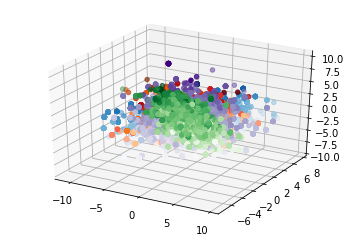


Iteration: 0
Cluster #0 changed by 0.0
Cluster #1 changed by 0.0
Cluster #2 changed by 0.0
Cluster #3 changed by 0.0
Cluster #4 changed by 1.93627171461
Cluster #5 changed by 0.0

Iteration: 1
Cluster #0 changed by 0.0
Cluster #1 changed by 0.0
Cluster #2 changed by 0.0
Cluster #3 changed by 1.15029850901
Cluster #4 changed by 0.0
Cluster #5 changed by 0.0

Iteration: 2
Cluster #0 changed by 0.0
Cluster #1 changed by 0.0
Cluster #2 changed by 0.0
Cluster #3 changed by 0.571731715546
Cluster #4 changed by 0.0
Cluster #5 changed by 0.0

 Error: 0.000207492677691


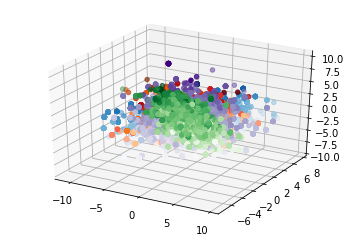

Best error: 0.000207492677691


In [67]:
debug = False
kmeans = Kmeans(6, True, max_iter=3, tol=.0005)

#kmeans.train(reduced)
model = fit(kmeans, reduced, 2)

In [68]:
my_predict = model.predict(reduced.values.tolist())

# Custom Model Accuracy

In [69]:
# convert K means output to class numbers 
testing = []

for i, row in enumerate(my_predict):
    for j in range(len(row)):
        if row[j] == 1:
            testing.append(j+1)

In [77]:
debug = True
actual = train_df_norm.loc[:, "class"].values.tolist()
predicted_miss = 0

for i in range(len(my_predict)):
    if debug and i % 25000 == 0:
        print(str(i) + ": my predicted - " + str(int(testing[i])) + " and actual - " + str(int(actual[i])))
        time.sleep(.1)
        
    if int(testing[i] != int(actual[i])):
        predicted_miss += 1
        

0: my predicted - 1 and actual - 1
25000: my predicted - 1 and actual - 2
50000: my predicted - 2 and actual - 5
75000: my predicted - 2 and actual - 2
100000: my predicted - 6 and actual - 4
125000: my predicted - 1 and actual - 1
150000: my predicted - 2 and actual - 2
175000: my predicted - 3 and actual - 6


In [71]:
print("my accuracy: " + str(100 - (float(predicted_miss)/float(len(my_predict))) * 100.0) + "%")

my accuracy: 27.2758245859%
